In [2]:
# Library import

import chardet # 인코딩
import pandas as pd
import numpy
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Set Path
# path_train = r"C:\Users\이수진\Desktop\electric_train.csv"

path_train = r"C:\Users\이수진\Desktop\changed_dataframe_train.csv"
path_test = r"C:\Users\이수진\Desktop\changed_dataframe_test.csv"

In [4]:
# Make DataFrame from CSV

df_train = pd.read_csv(path_train)
df_test = pd.read_csv(path_test)

In [5]:
# Check the number of columns

print(f"Shape of train:", df_train.shape)
print(f"Shape of test:", df_test.shape)

Shape of train: (1048575, 18)
Shape of test: (1048575, 13)


In [6]:
# train과 test의 Unnamed: 0 index 컬럼 삭제

# del df_train["Unnamed: 0"]
# del df_test["Unnamed: 0"]

In [7]:
df_train.head()

,c_num,e_n,c_stn,e_sum_qctr,e_sum_load,e_n_mean_load,c_nph_ta,c_nph_hm,c_nph_ws_10m,c_nph_rn_60m,c_nph_ta_chi,e_weekday,e_week_name,e_elec,year,month,day,hour
0,4821,11,884,6950,751.32,68.606449,2.2,62.7,1.8,0.0,-1.0,4,0,99.56,2021,1,1,1
1,4821,11,884,6950,692.60,68.606449,2.3,63.1,2.1,0.0,-0.6,4,0,91.78,2021,1,1,2
2,4821,11,884,6950,597.48,68.606449,2.2,62.4,2.5,0.0,-1.3,4,0,79.17,2021,1,1,3
3,4821,11,884,6950,553.48,68.606449,1.7,63.5,1.7,0.0,-0.2,4,0,73.34,2021,1,1,4
4,4821,11,884,6950,526.24,68.606449,1.7,63.0,1.6,0.0,-0.8,4,0,69.73,2021,1,1,5


In [8]:
df_test.head()

,c_num,c_stn,c_nph_ta,c_nph_hm,c_nph_ws_10m,c_nph_rn_60m,c_nph_ta_chi,e_weekday,e_week_name,year,month,day,hour
0,2385,303,7.8,61.5,6.7,0.0,4.2,6,1,2023,1,1,1
1,2385,303,7.9,60.6,7.6,0.0,4.0,6,1,2023,1,1,2
2,2385,303,8.2,61.9,8.7,0.0,4.1,6,1,2023,1,1,3
3,2385,303,8.4,60.9,9.2,0.0,4.3,6,1,2023,1,1,4
4,2385,303,8.5,60.9,9.5,0.0,4.3,6,1,2023,1,1,5


In [9]:
# 공동주택 가구 수 "e_n" 중복 제거 값 확인
print(f"Unique values in e_n: {sorted(df_train['e_n'].unique())}")
print(f"Length of unique values in e_n: {len(df_train['e_n'].unique())}")
print(f"Columns in df_train: {df_train.columns}")
# set(df['e_n']) 2번



Unique values in e_n: [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 37, 38, 41, 42, 43, 44, 45, 46, 49, 50, 52, 53, 57, 58, 62, 68, 70, 72, 73, 75, 76, 78, 81, 85, 87, 90, 101, 102, 126]
Length of unique values in e_n: 54
Columns in df_train: Index(['c_num', 'e_n', 'c_stn', 'e_sum_qctr', 'e_sum_load', 'e_n_mean_load',
       'c_nph_ta', 'c_nph_hm', 'c_nph_ws_10m', 'c_nph_rn_60m', 'c_nph_ta_chi',
       'e_weekday', 'e_week_name', 'e_elec', 'year', 'month', 'day', 'hour'],
      dtype='object')


In [10]:
print("* Information of Train Dataset")
print(f"격자넘버:", sorted(df_train['c_num'].unique())) # 5km * 5km 
print(f"지점번호:", sorted(df_train['c_stn'].unique())) # 측정위치
print(f"df_train의 격자넘버 개수: ",len(df_train['c_num'].unique()))
print(f"df_train의 지점번호 개수: ",len(df_train['c_stn'].unique()))
print("---------" * 15)

print("* Information of Test Dataset")
print(f"test_격자넘버:", sorted(df_test['c_num'].unique())) # 5km * 5km 
print(f"test_지점번호:", sorted(df_test['c_stn'].unique())) # 측정위치
print(f"df_test의 격자넘버 개수: ",len(df_test['c_num'].unique()))
print(f"df_test의 지점번호 개수: ",len(df_test['c_stn'].unique()))



* Information of Train Dataset
격자넘버: [4821, 5565, 5566, 5567, 8994, 9609, 9735, 9736, 9758, 9759, 9884, 9885, 10069, 10070, 10218, 10222, 10223, 10224, 10351, 10352, 10354, 10361, 10486, 10487, 10787, 10808, 10824, 10934, 10935, 10936, 10937, 10970, 10972, 10973, 10974, 10975, 10976, 11083, 11084, 11085, 11086, 11106, 11107, 11115, 11117, 11119, 11122, 11123]
지점번호: [155, 156, 159, 162, 165, 168, 184, 192, 261, 266, 294, 313, 330, 708, 710, 712, 713, 722, 774, 783, 788, 884, 904, 907, 908, 917, 938, 942, 950]
df_train의 격자넘버 개수:  48
df_train의 지점번호 개수:  29
---------------------------------------------------------------------------------------------------------------------------------------
* Information of Test Dataset
test_격자넘버: [2385, 4816, 4821, 5565, 5566, 5567, 8994, 9735, 9736, 9884, 9885, 10487, 10787, 10934, 10935, 10936, 10937, 11083, 11084, 11085, 11086, 11233, 11234, 11376, 12276, 13470, 13614, 13615, 13619, 14805, 16001, 16140, 16143, 16153, 16292, 16301, 16302, 16593, 16895, 

In [11]:
df_train["e_tm"] = pd.to_datetime(df_train['e_tm'])


KeyError: 'e_tm'

In [12]:
# 상관관계 계산
correlation_matrix = df_train.corr()

# 'e_elec' 피처와의 상관관계만 확인
corr_with_e_elec = correlation_matrix['e_elec']

print(corr_with_e_elec)


c_num           -0.000104
e_n             -0.000389
c_stn           -0.000199
e_sum_qctr      -0.000439
e_sum_load       0.310752
e_n_mean_load   -0.000017
c_nph_ta         0.249398
c_nph_hm         0.123387
c_nph_ws_10m     0.009656
c_nph_rn_60m     0.024346
c_nph_ta_chi     0.242011
e_weekday        0.037302
e_week_name      0.052661
e_elec           1.000000
year             0.000059
month            0.046501
day             -0.009711
hour             0.576610
Name: e_elec, dtype: float64


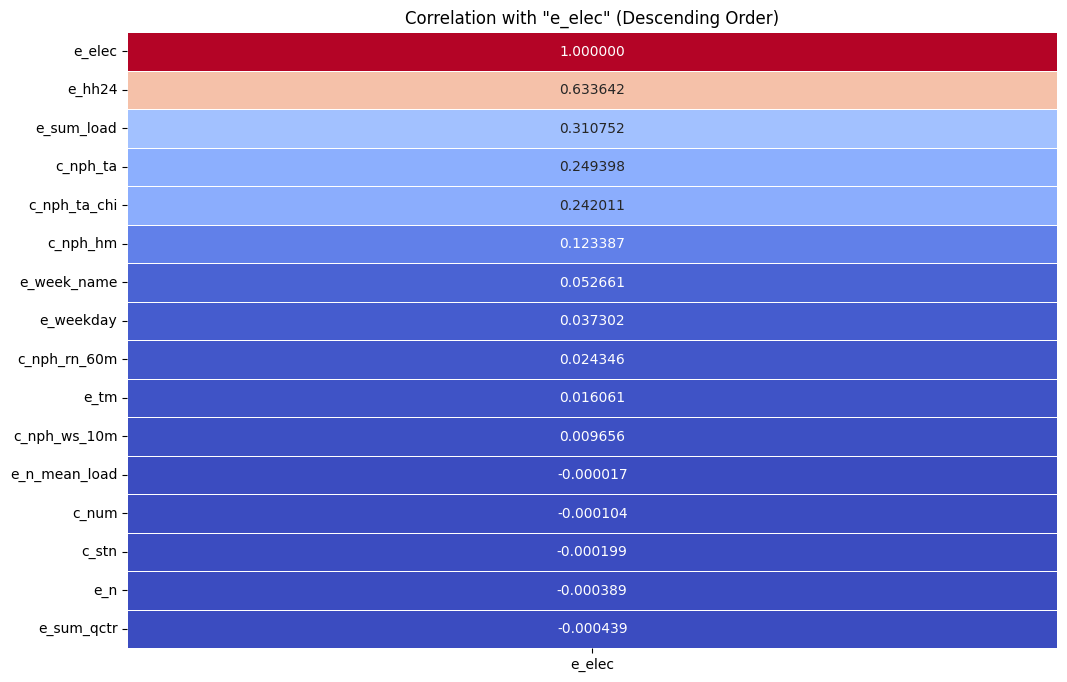

In [ ]:
# 상관관계 계산
correlation_matrix = df_train.corr()

# 'e_elec' 피처와의 상관관계만 확인
corr_with_e_elec = correlation_matrix['e_elec']

# 상관관계를 내림차순으로 정렬
correlation_with_elec_sorted = corr_with_e_elec.sort_values(ascending=False)

# 상관관계 행렬 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_with_elec_sorted.to_frame(), annot=True, cmap='coolwarm', fmt=".6f", linewidths=.5, cbar=False)
plt.title('Correlation with "e_elec" (Descending Order)')
plt.show()


In [ ]:
df_train

,c_num,e_tm,e_hh24,e_n,c_stn,e_sum_qctr,e_sum_load,e_n_mean_load,c_nph_ta,c_nph_hm,c_nph_ws_10m,c_nph_rn_60m,c_nph_ta_chi,e_weekday,e_week_name,e_elec
0,4821,2021-01-01 1:00,1,11,884,6950,751.32,68.606449,2.2,62.7,1.8,0.0,-1.0,4,0,99.56
1,4821,2021-01-01 2:00,2,11,884,6950,692.60,68.606449,2.3,63.1,2.1,0.0,-0.6,4,0,91.78
2,4821,2021-01-01 3:00,3,11,884,6950,597.48,68.606449,2.2,62.4,2.5,0.0,-1.3,4,0,79.17
3,4821,2021-01-01 4:00,4,11,884,6950,553.48,68.606449,1.7,63.5,1.7,0.0,-0.2,4,0,73.34
4,4821,2021-01-01 5:00,5,11,884,6950,526.24,68.606449,1.7,63.0,1.6,0.0,-0.8,4,0,69.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,11123,2021-08-03 11:00,11,87,938,118100,23887.84,218.153104,28.2,87.2,2.1,0.0,30.2,1,0,125.86
1048571,11123,2021-08-03 12:00,12,87,938,118100,25385.60,218.153104,28.3,85.1,2.2,0.0,31.6,1,0,133.75
1048572,11123,2021-08-03 13:00,13,87,938,118100,27116.16,218.153104,28.5,85.3,3.5,0.0,32.0,1,0,142.87
1048573,11123,2021-08-03 14:00,14,87,938,118100,27756.16,218.153104,28.5,83.0,3.9,0.0,32.2,1,0,146.24


In [ ]:
# df_train.reset_index(inplace=True)

In [ ]:
# df_train

,index,c_num,e_tm,e_hh24,e_n,c_stn,e_sum_qctr,e_sum_load,e_n_mean_load,c_nph_ta,c_nph_hm,c_nph_ws_10m,c_nph_rn_60m,c_nph_ta_chi,e_weekday,e_week_name,e_elec,e_week_name_encoded
0,0,4821,2021-01-01 01:00:00,1,11,884,6950,751.32,68.606449,2.2,62.7,1.8,0.0,-1.0,4,0,99.56,NaN
1,1,4821,2021-01-01 02:00:00,2,11,884,6950,692.60,68.606449,2.3,63.1,2.1,0.0,-0.6,4,0,91.78,NaN
2,2,4821,2021-01-01 03:00:00,3,11,884,6950,597.48,68.606449,2.2,62.4,2.5,0.0,-1.3,4,0,79.17,NaN
3,3,4821,2021-01-01 04:00:00,4,11,884,6950,553.48,68.606449,1.7,63.5,1.7,0.0,-0.2,4,0,73.34,NaN
4,4,4821,2021-01-01 05:00:00,5,11,884,6950,526.24,68.606449,1.7,63.0,1.6,0.0,-0.8,4,0,69.73,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1048570,11123,2021-08-03 11:00:00,11,87,938,118100,23887.84,218.153104,28.2,87.2,2.1,0.0,30.2,1,0,125.86,NaN
1048571,1048571,11123,2021-08-03 12:00:00,12,87,938,118100,25385.60,218.153104,28.3,85.1,2.2,0.0,31.6,1,0,133.75,NaN
1048572,1048572,11123,2021-08-03 13:00:00,13,87,938,118100,27116.16,218.153104,28.5,85.3,3.5,0.0,32.0,1,0,142.87,NaN
1048573,1048573,11123,2021-08-03 14:00:00,14,87,938,118100,27756.16,218.153104,28.5,83.0,3.9,0.0,32.2,1,0,146.24,NaN


In [ ]:
def col():
  print('''

  'c_nph_ta': 기온
  'c_nph_hm':상대습도
  'c_nph_ws_10m':풍속
  'c_nph_rn_60m':강수량
  'c_nph_ta_chi:체감온도

''')

In [ ]:
col()



  'c_nph_ta': 기온
  'c_nph_hm':상대습도
  'c_nph_ws_10m':풍속
  'c_nph_rn_60m':강수량
  'c_nph_ta_chi:체감온도




In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 18 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   c_num          1048575 non-null  int64  
 1   e_n            1048575 non-null  int64  
 2   c_stn          1048575 non-null  int64  
 3   e_sum_qctr     1048575 non-null  int64  
 4   e_sum_load     1048575 non-null  float64
 5   e_n_mean_load  1048575 non-null  float64
 6   c_nph_ta       1048575 non-null  float64
 7   c_nph_hm       1048575 non-null  float64
 8   c_nph_ws_10m   1048575 non-null  float64
 9   c_nph_rn_60m   1048575 non-null  float64
 10  c_nph_ta_chi   1048575 non-null  float64
 11  e_weekday      1048575 non-null  int64  
 12  e_week_name    1048575 non-null  int64  
 13  e_elec         1048575 non-null  float64
 14  year           1048575 non-null  int64  
 15  month          1048575 non-null  int64  
 16  day            1048575 non-null  int64  
 17  hour    

In [ ]:
df_train['c_num'].value_counts()

c_num
10787    26304
11085    26304
11107    26304
10487    26304
5565     26304
10808    26304
10824    26304
10934    26304
10935    26304
10936    26304
10937    26304
10970    26304
10972    26304
10973    26304
10974    26304
11106    26304
11083    26304
10354    26304
10352    26304
10351    26304
9884     26304
5566     26304
11122    26304
11117    26304
9736     26304
9758     26304
11115    26304
11084    26304
9885     26304
10069    26304
10222    26304
10223    26304
10070    17544
10218    17544
5567     17544
10361    17544
9759     17544
8994     17520
10975    17520
11123    13935
11086     8784
10486     8784
9735      8784
10976     8760
10224     8760
11119     8760
9609      8760
4821      8760
Name: count, dtype: int64

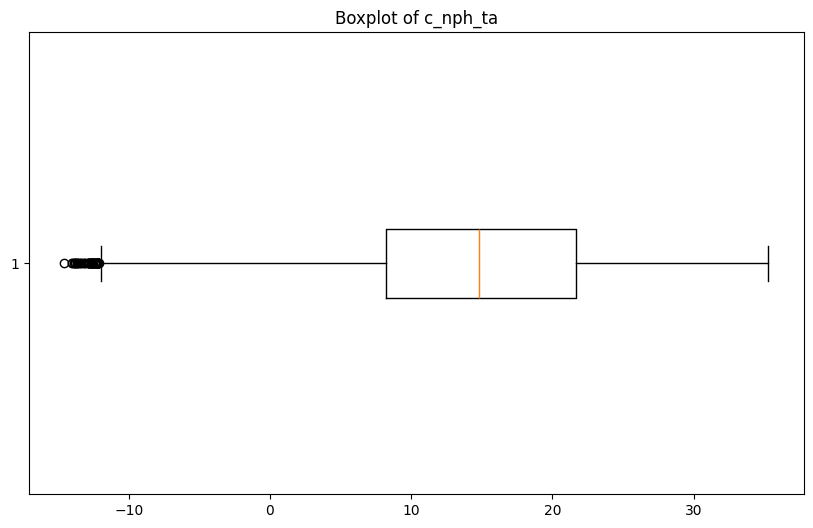

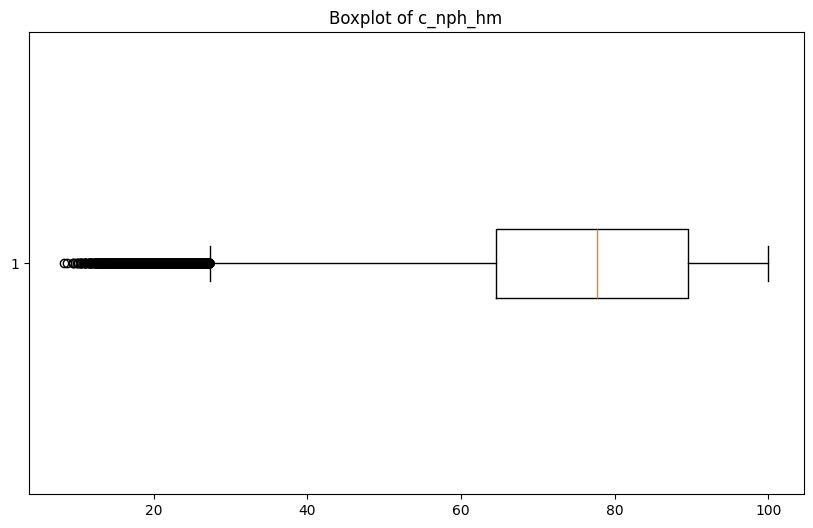

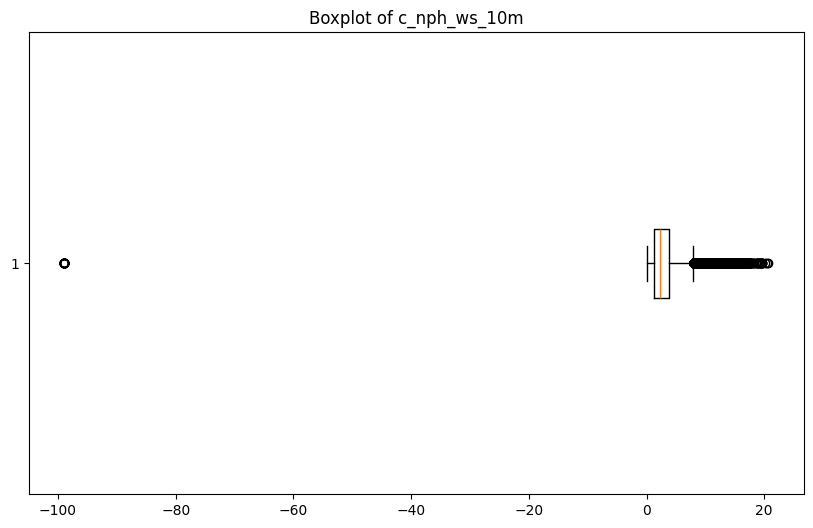

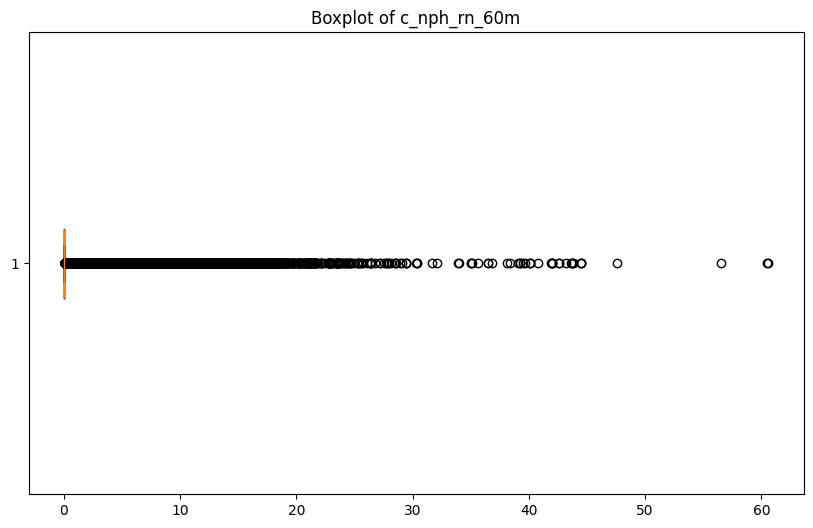

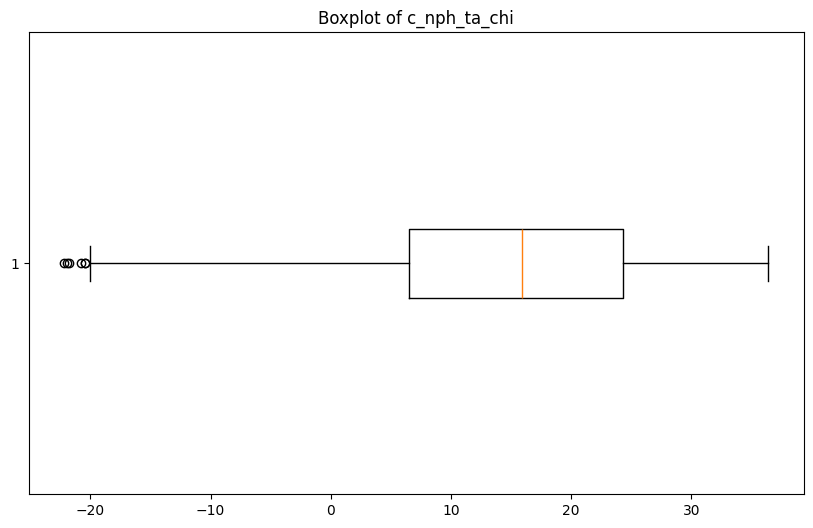

In [ ]:
import matplotlib.pyplot as plt

columns = ['c_nph_ta', 'c_nph_hm', 'c_nph_ws_10m','c_nph_rn_60m', 'c_nph_ta_chi']
for column in columns:
    plt.figure(figsize=(10, 6))
    plt.boxplot(df_train[column].dropna(), vert=False)
    plt.title(f'Boxplot of {column}')

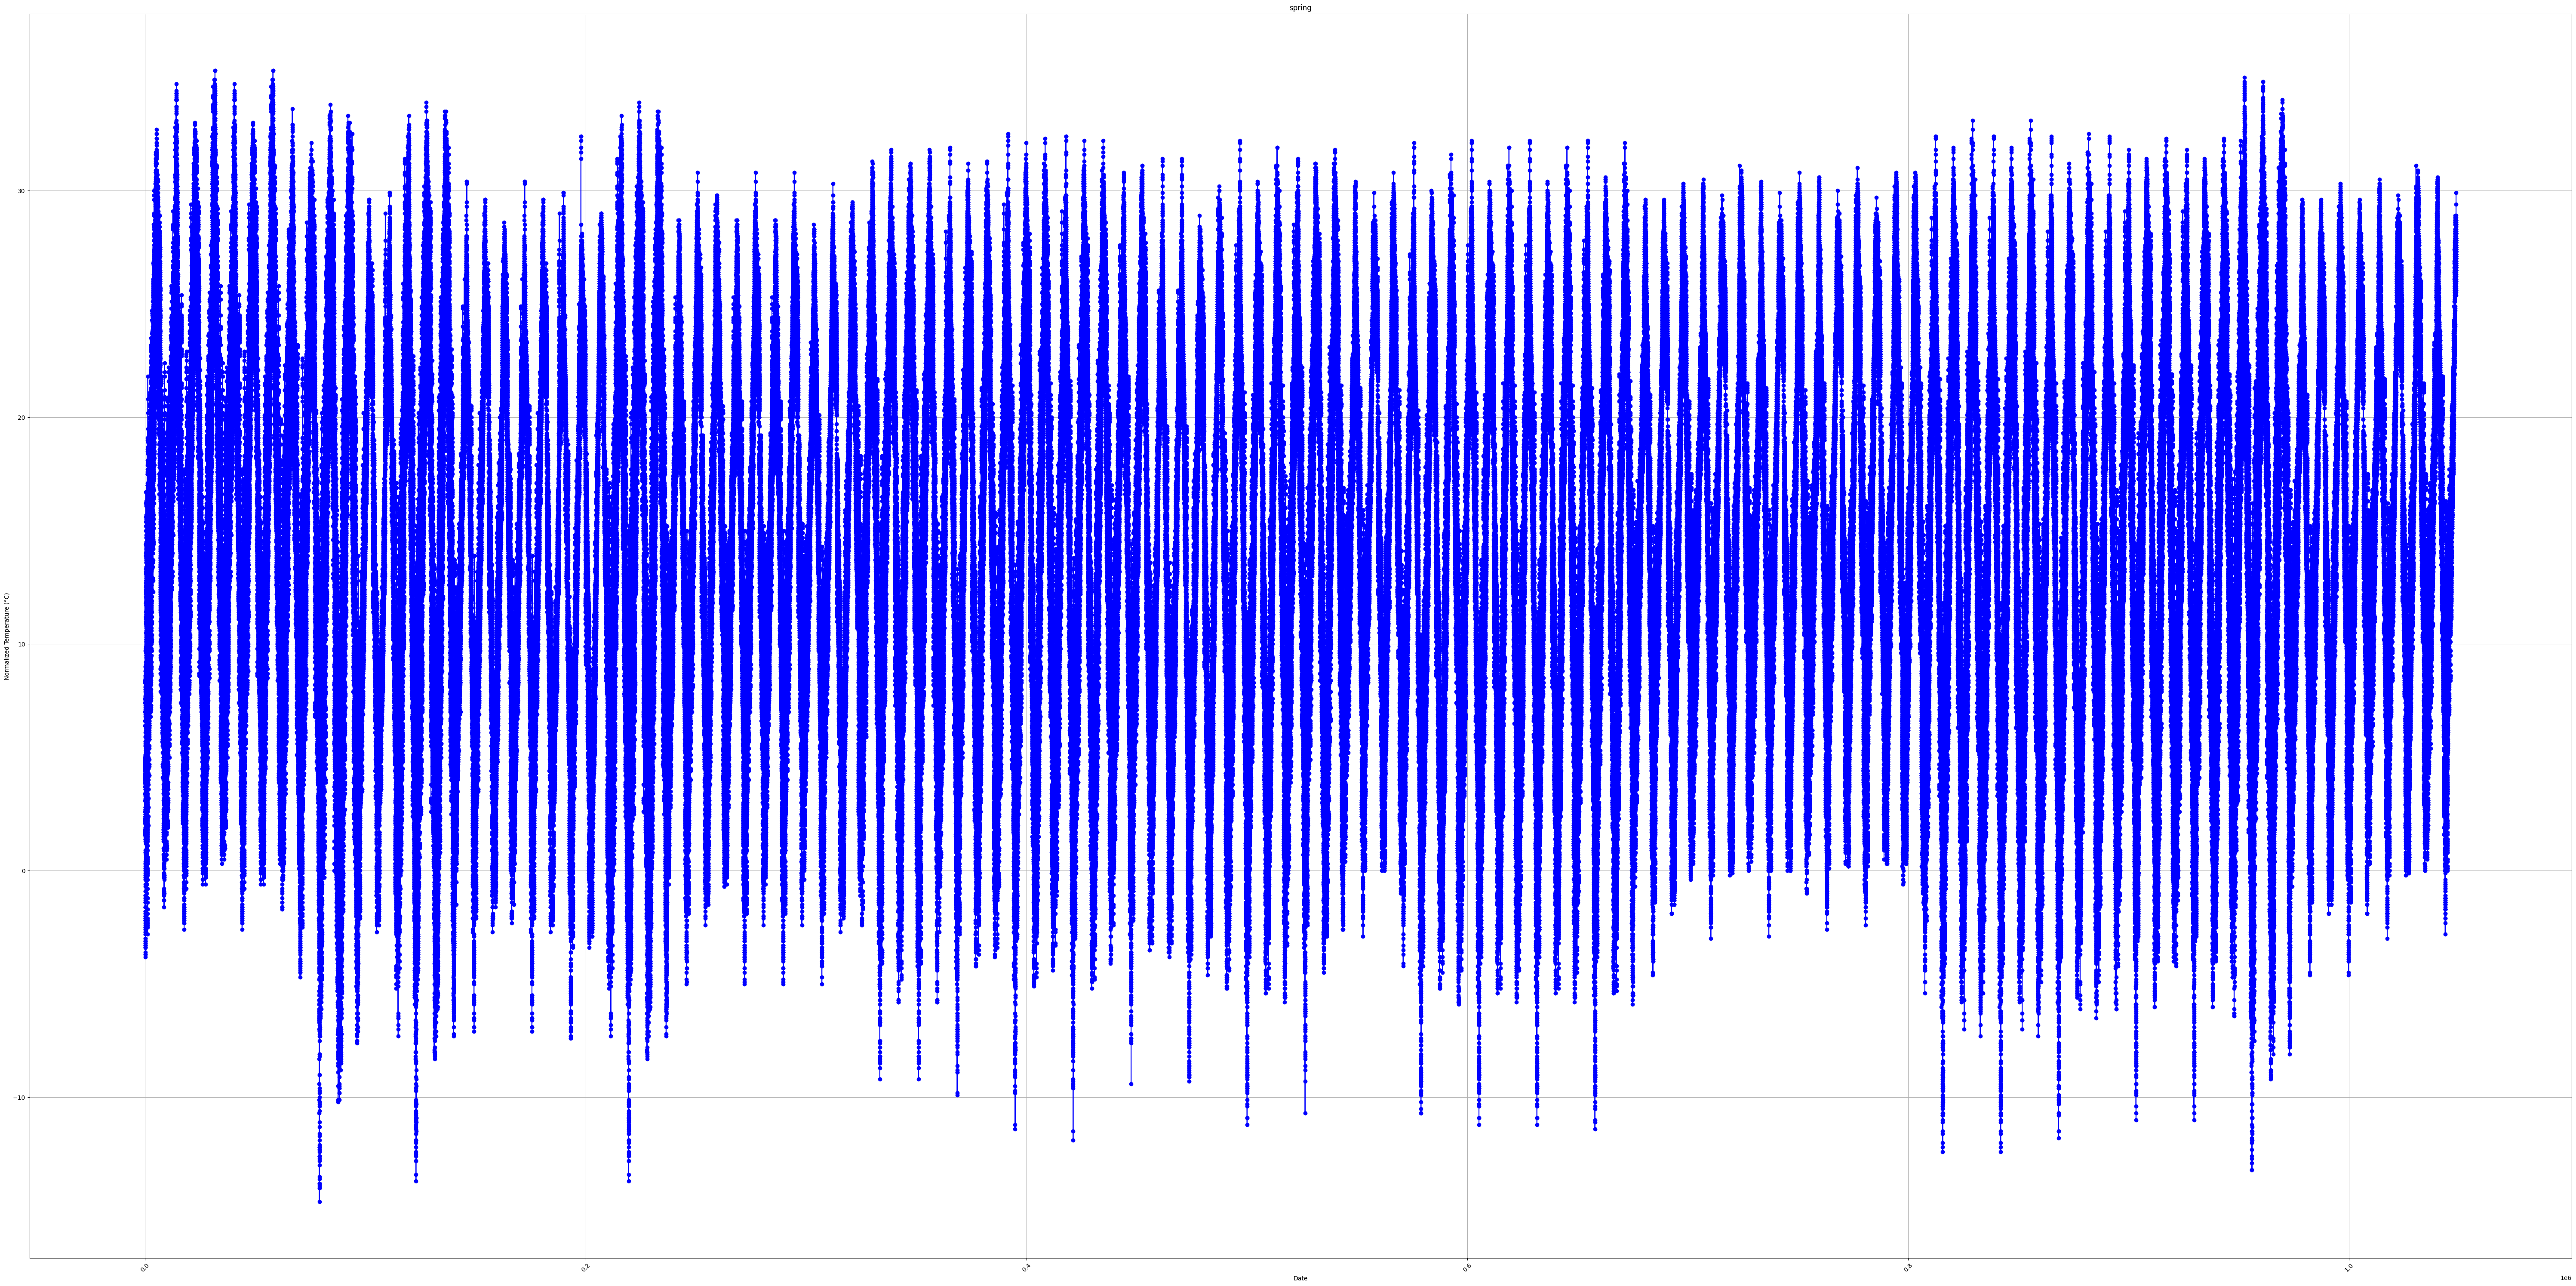

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns


# 그래프 그리기
plt.figure(figsize=(60, 30))

x=df_train.index
y=df_train.c_nph_ta

# 그래프를 그립니다.
plt.plot(x,y,marker='o', linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Normalized Temperature (°C)')
plt.title('spring')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

In [5]:
c_num = pd.get_dummies(df_train['c_num']).astype('int')
c_num # 하다예 바보 쿠쿠다스 간식루팡 아님 왜 안되는지 모르겠음


,4821,5565,5566,5567,8994,9609,9735,9736,9758,9759,...,11084,11085,11086,11106,11107,11115,11117,11119,11122,11123
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1048571,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1048572,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1048573,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [6]:
c_stn = pd.get_dummies(df_train['c_stn']).astype('int')
c_stn

,155,156,159,162,165,168,184,192,261,266,...,783,788,884,904,907,908,917,938,942,950
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1048571,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1048572,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1048573,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [7]:
df_train = pd.concat([df_train,c_num,c_stn], axis=1)
df_train

,c_num,e_n,c_stn,e_sum_qctr,e_sum_load,e_n_mean_load,c_nph_ta,c_nph_hm,c_nph_ws_10m,c_nph_rn_60m,...,783,788,884,904,907,908,917,938,942,950
0,4821,11,884,6950,751.32,68.606449,2.2,62.7,1.8,0.0,...,0,0,1,0,0,0,0,0,0,0
1,4821,11,884,6950,692.60,68.606449,2.3,63.1,2.1,0.0,...,0,0,1,0,0,0,0,0,0,0
2,4821,11,884,6950,597.48,68.606449,2.2,62.4,2.5,0.0,...,0,0,1,0,0,0,0,0,0,0
3,4821,11,884,6950,553.48,68.606449,1.7,63.5,1.7,0.0,...,0,0,1,0,0,0,0,0,0,0
4,4821,11,884,6950,526.24,68.606449,1.7,63.0,1.6,0.0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,11123,87,938,118100,23887.84,218.153104,28.2,87.2,2.1,0.0,...,0,0,0,0,0,0,0,1,0,0
1048571,11123,87,938,118100,25385.60,218.153104,28.3,85.1,2.2,0.0,...,0,0,0,0,0,0,0,1,0,0
1048572,11123,87,938,118100,27116.16,218.153104,28.5,85.3,3.5,0.0,...,0,0,0,0,0,0,0,1,0,0
1048573,11123,87,938,118100,27756.16,218.153104,28.5,83.0,3.9,0.0,...,0,0,0,0,0,0,0,1,0,0


In [16]:
df_train.head()

,c_num,e_n,c_stn,e_sum_qctr,e_sum_load,e_n_mean_load,c_nph_ta,c_nph_hm,c_nph_ws_10m,c_nph_rn_60m,...,783,788,884,904,907,908,917,938,942,950
0,4821,11,884,6950,751.32,68.606449,2.2,62.7,1.8,0.0,...,0,0,1,0,0,0,0,0,0,0
1,4821,11,884,6950,692.60,68.606449,2.3,63.1,2.1,0.0,...,0,0,1,0,0,0,0,0,0,0
2,4821,11,884,6950,597.48,68.606449,2.2,62.4,2.5,0.0,...,0,0,1,0,0,0,0,0,0,0
3,4821,11,884,6950,553.48,68.606449,1.7,63.5,1.7,0.0,...,0,0,1,0,0,0,0,0,0,0
4,4821,11,884,6950,526.24,68.606449,1.7,63.0,1.6,0.0,...,0,0,1,0,0,0,0,0,0,0


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 95 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   c_num          1048575 non-null  int64  
 1   e_n            1048575 non-null  int64  
 2   c_stn          1048575 non-null  int64  
 3   e_sum_qctr     1048575 non-null  int64  
 4   e_sum_load     1048575 non-null  float64
 5   e_n_mean_load  1048575 non-null  float64
 6   c_nph_ta       1048575 non-null  float64
 7   c_nph_hm       1048575 non-null  float64
 8   c_nph_ws_10m   1048575 non-null  float64
 9   c_nph_rn_60m   1048575 non-null  float64
 10  c_nph_ta_chi   1048575 non-null  float64
 11  e_weekday      1048575 non-null  int64  
 12  e_week_name    1048575 non-null  int64  
 13  e_elec         1048575 non-null  float64
 14  year           1048575 non-null  int64  
 15  month          1048575 non-null  int64  
 16  day            1048575 non-null  int64  
 17  hour    

In [9]:
df_train.columns

Index([        'c_num',           'e_n',         'c_stn',    'e_sum_qctr',
          'e_sum_load', 'e_n_mean_load',      'c_nph_ta',      'c_nph_hm',
        'c_nph_ws_10m',  'c_nph_rn_60m',  'c_nph_ta_chi',     'e_weekday',
         'e_week_name',        'e_elec',          'year',         'month',
                 'day',          'hour',            4821,            5565,
                  5566,            5567,            8994,            9609,
                  9735,            9736,            9758,            9759,
                  9884,            9885,           10069,           10070,
                 10218,           10222,           10223,           10224,
                 10351,           10352,           10354,           10361,
                 10486,           10487,           10787,           10808,
                 10824,           10934,           10935,           10936,
                 10937,           10970,           10972,           10973,
                 10974,  

In [10]:
nan_counts = df_train.isnull().sum()
nan_counts.value_counts()

0    95
Name: count, dtype: int64

In [11]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# 예제 데이터프레임 생성 (필요시 이 부분은 삭제하세요)
# df_train = pd.DataFrame({
#     'e_sum_qctr': [1, 2, 3],
#     'e_n': [4, 5, 6],
#     'e_sum_load': [7, 8, 9],
#     'e_n_mean_load': [10, 11, 12],
#     'feature_1': [13, 14, 15],
#     0: [16, 17, 18]  # 정수형 열 이름 예시
# })

# MinMaxScaler 선언 및 Fitting
mMscaler = MinMaxScaler()

# 데이터 프레임에서 열 삭제
df_train = df_train.drop(columns=['c_num','c_stn','e_sum_qctr', 'e_n', 'e_sum_load', 'e_n_mean_load'])

# 열 이름을 문자열로 변환
df_train.columns = df_train.columns.astype(str)

# 스케일러 피팅
mMscaler.fit(df_train)

# 데이터 변환
mMscaled_data = mMscaler.transform(df_train)

# 데이터 프레임으로 저장
mMscaled_data = pd.DataFrame(mMscaled_data, columns=df_train.columns)

# 변환된 데이터 확인
print(mMscaled_data.head())

   c_nph_ta  c_nph_hm  c_nph_ws_10m  c_nph_rn_60m  c_nph_ta_chi  e_weekday  \
0  0.336673  0.593239      0.842105           0.0      0.361775   0.666667   
1  0.338677  0.597601      0.844612           0.0      0.368601   0.666667   
2  0.336673  0.589967      0.847953           0.0      0.356655   0.666667   
3  0.326653  0.601963      0.841270           0.0      0.375427   0.666667   
4  0.326653  0.596510      0.840434           0.0      0.365188   0.666667   

   e_week_name    e_elec      year  month  ...  783  788  884  904  907  908  \
0          0.0  0.223792  0.333333    0.0  ...  0.0  0.0  1.0  0.0  0.0  0.0   
1          0.0  0.185100  0.333333    0.0  ...  0.0  0.0  1.0  0.0  0.0  0.0   
2          0.0  0.122389  0.333333    0.0  ...  0.0  0.0  1.0  0.0  0.0  0.0   
3          0.0  0.093396  0.333333    0.0  ...  0.0  0.0  1.0  0.0  0.0  0.0   
4          0.0  0.075443  0.333333    0.0  ...  0.0  0.0  1.0  0.0  0.0  0.0   

   917  938  942  950  
0  0.0  0.0  0.0  0.0  
1 

In [ ]:
n = 20000  # 저장할 행의 수
df_subset = df_train.iloc[:n]

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Conv1D, MaxPool1D, GlobalMaxPool1D, LSTM, Input
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Input(shape=(89,1)))  # Input layer 추가
model.add(Conv1D(32, 3, activation='relu'))
model.add(MaxPool1D(2))
model.add(Conv1D(32, 3, activation='relu'))
model.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1))

model.compile(optimizer=Adam(1e-4), loss='mse', metrics=['mae'])

In [13]:
x_train = df_train.drop(columns=['e_elec'])
y_train = df_train['e_elec']

In [ ]:
history = model.fit(x_train, y_train,epochs=200, batch_size=32)

Epoch 1/200
 2011/32768 ━━━━━━━━━━━━━━━━━━━━ 16:05 31ms/step - loss: 9635.1221 - mae: 94.7580

: 

: 